<a href="https://colab.research.google.com/github/Heena-357/ML-Project/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train = pd.read_json('/content/train.json')
df_train.head()


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


<Axes: >

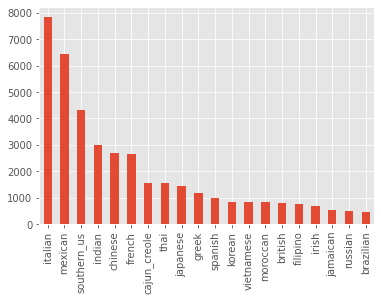

In [ ]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

In [ ]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [ ]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [ ]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [ ]:
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()


,id,cuisine,ingredients,every_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [ ]:
df_train['every_ingredients'].str.contains('pepper')

0         True
1         True
2         True
3        False
4         True
         ...  
39769    False
39770     True
39771    False
39772    False
39773     True
Name: every_ingredients, Length: 39774, dtype: bool

<Axes: title={'center': 'pepper as found per cuisine'}>

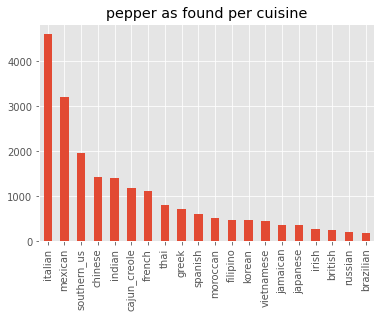

In [ ]:
indices = df_train['every_ingredients'].str.contains('pepper')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='pepper as found per cuisine')


In [ ]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique


array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

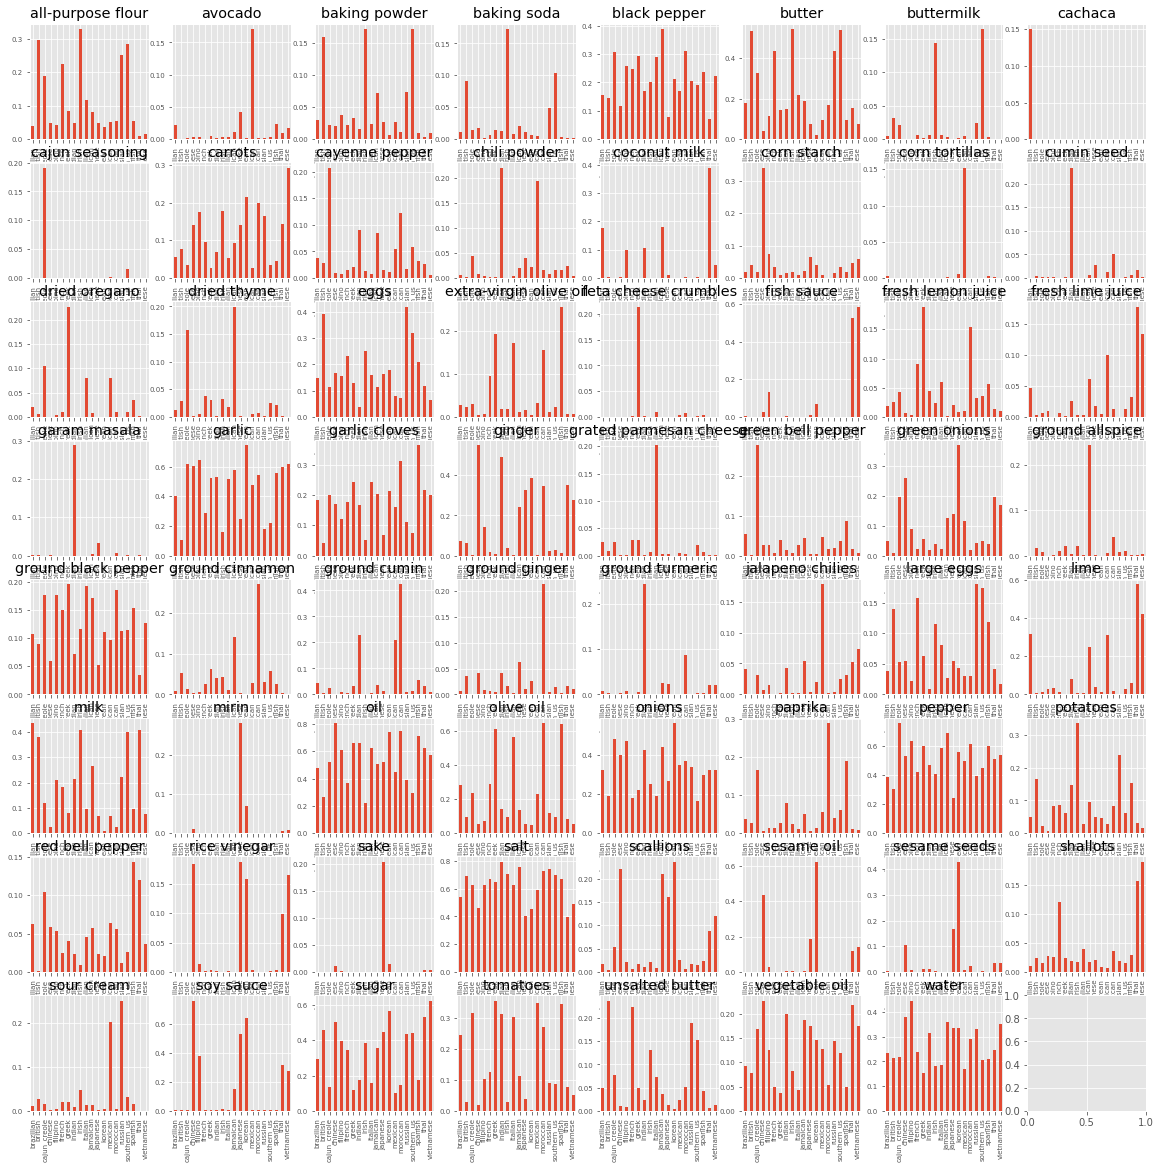

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df_train['every_ingredients'].values)
X.shape


(39774, 3010)

In [ ]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
y[:100]


array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [ ]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logistic.score(X_test, y_test)

0.7802639849151477

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree.score(X_test, y_test)

0.6404776869893148

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbor=KNeighborsClassifier()
neighbor.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
neighbor.score(X_test, y_test)


0.6294154619736015

Text(0.5, 64.84999999999997, 'Predicted label')

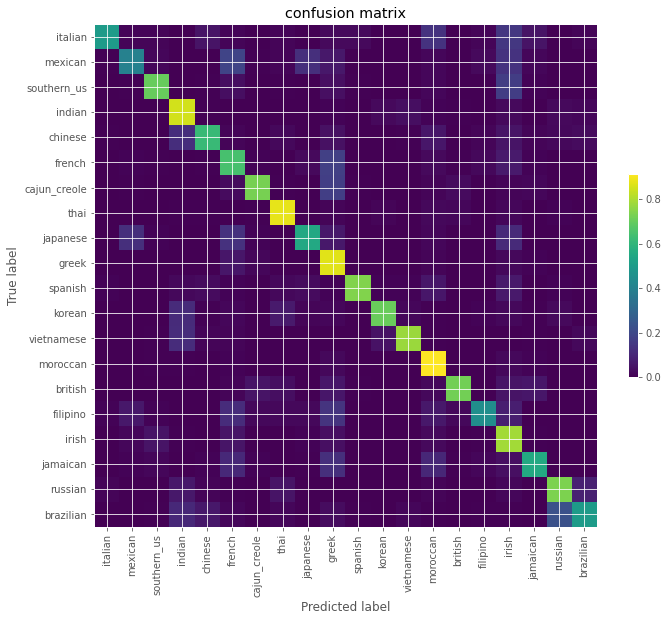

In [ ]:
#Inspecting the classification results using a confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.73      0.50      0.59        82
     mexican       0.56      0.40      0.47       172
 southern_us       0.76      0.70      0.73       305
      indian       0.77      0.85      0.81       490
     chinese       0.70      0.62      0.65       149
      french       0.56      0.65      0.60       507
cajun_creole       0.76      0.72      0.74       232
        thai       0.89      0.88      0.89       631
    japanese       0.58      0.55      0.57       138
       greek       0.83      0.87      0.85      1570
     spanish       0.85      0.74      0.79       111
      korean       0.85      0.70      0.77       267
  vietnamese       0.81      0.77      0.79       155
    moroccan       0.90      0.91      0.91      1329
     british       0.77      0.72      0.74       145
    filipino       0.58      0.45      0.51       102
       irish       0.72      0.79      0.75       883
    jamaican       0.62    